<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-581557-1694628549/blob/main/Assignment_3_Mohamed_Irfan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **21BBT0325**
## **Mohamed Irfan Abdul Khader VIT Vellore**
## Assignment 3

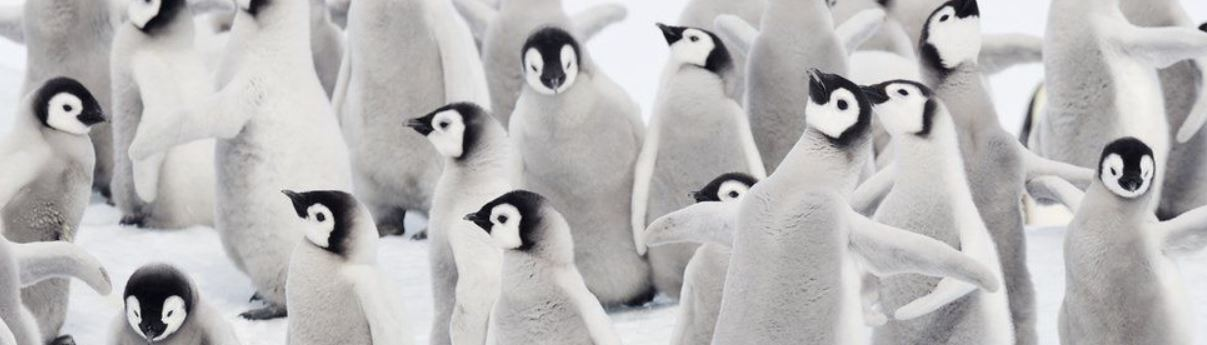

## **Penguin Classification Analysis**

The Penguin Classification Analysis problem involves predicting the species of a penguin based on various physical characteristics. The dataset includes information about the body mass, culmen length, culmen depth, flipper length, and sex of different penguin species.

The problem is typically approached as a classification problem, where the target variable is
the penguin species, and the features are the physical characteristics of the penguins.

Accurate classification of penguin species can also help researchers understand the effects of
climate change and other environmental factors on penguin populations. The problem can
also be useful for conservation efforts, as it can help identify and protect endangered penguin
species

**Attribute Information**:

● Species: penguin species (Chinstrap, Adélie, or Gentoo)

● Island: island name (Dream, Torgersen, or Biscoe) in Antarctica

● culmen_length_mm: culmen length (mm)

● culmen_depth_mm: culmen depth (mm)

● flipper_length_mm: flipper length (mm)

● body_mass_g: body mass (g)

● Sex: penguin sex

In [2]:
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import RcParams
import pandas as pd
import numpy as np
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/drive/MyDrive/21BBT0325 VIT AIML ASSIGNMENTS/penguins_size.csv')
pd.set_option('display.max_colwidth', None)
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
df.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### **Handling Null Values**

In [7]:
df.culmen_length_mm  = df.culmen_length_mm.fillna(df.culmen_length_mm.median())
df.culmen_depth_mm   = df.culmen_depth_mm.fillna(df.culmen_depth_mm.median())
df.flipper_length_mm = df.flipper_length_mm.fillna(df.flipper_length_mm.median())
df.body_mass_g       = df.body_mass_g.fillna(df.body_mass_g.median())
df.sex               = df.sex.fillna(df.sex.mode().values[0])
df.sex[ df.sex == '.'] = df.sex.mode().values[0]

In [8]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Null values have been replaced with median and mode respectively

The box plots visualise the absence of Outliers

### **Descriptive statistics**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,344.0,43.925000,5.443792,32.1,39.275,44.45,48.5,59.6
culmen_depth_mm,344.0,17.152035,1.969060,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,344.0,200.892442,14.023826,172.0,190.000,197.00,213.0,231.0
body_mass_g,344.0,4200.872093,799.696532,2700.0,3550.000,4050.00,4750.0,6300.0


### **Univariate Analysis**

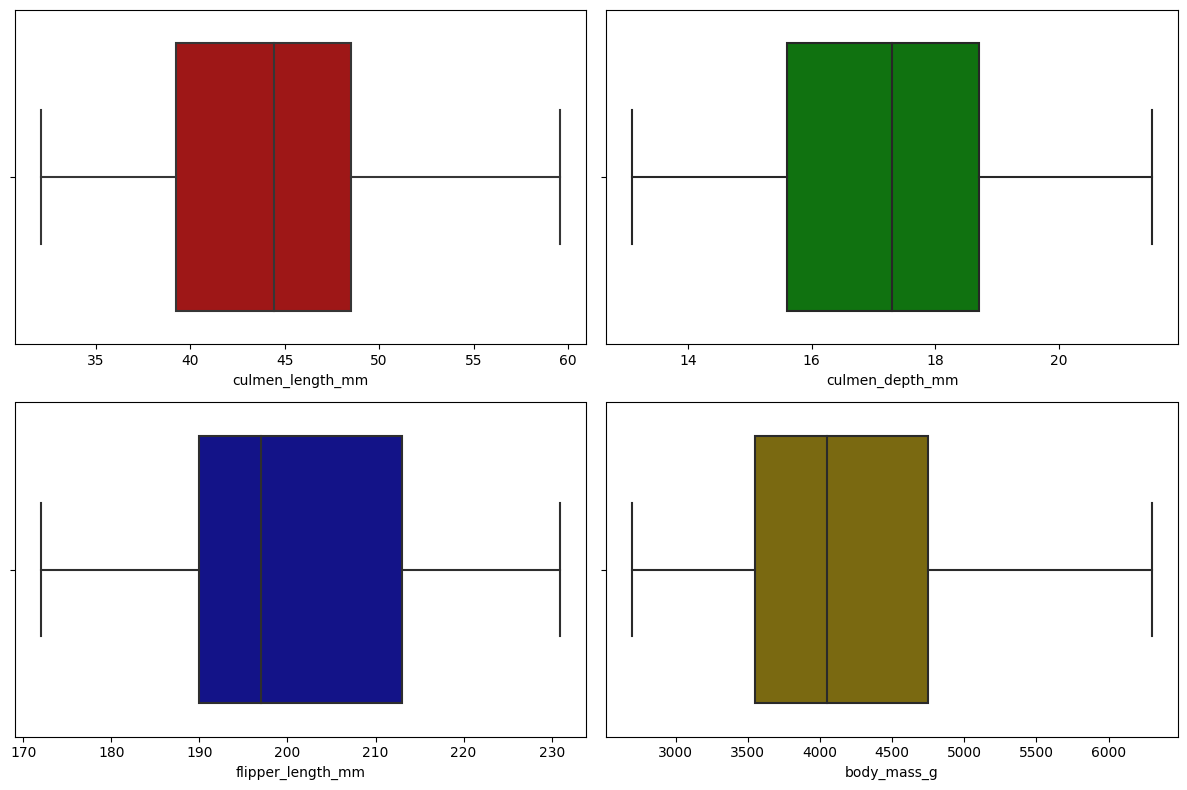

In [10]:
colors = ['#B40000', '#008200', '#00009B', '#8B7500']

pl.figure(figsize=(12, 8))

for i, feature in enumerate(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']):
    pl.subplot(2, 2, i+1)
    sns.boxplot(x=df[feature], color=colors[i])

pl.tight_layout()
pl.show()

**The boxplots indicate the absence of any outliers**

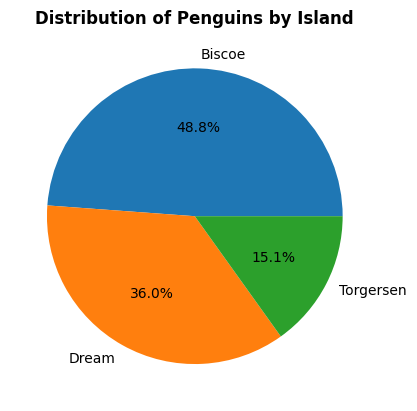

In [11]:
pl.pie(df['island'].value_counts(), labels=df['island'].value_counts().index, autopct='%1.1f%%')
pl.title("Distribution of Penguins by Island",fontweight='bold')
pl.show()

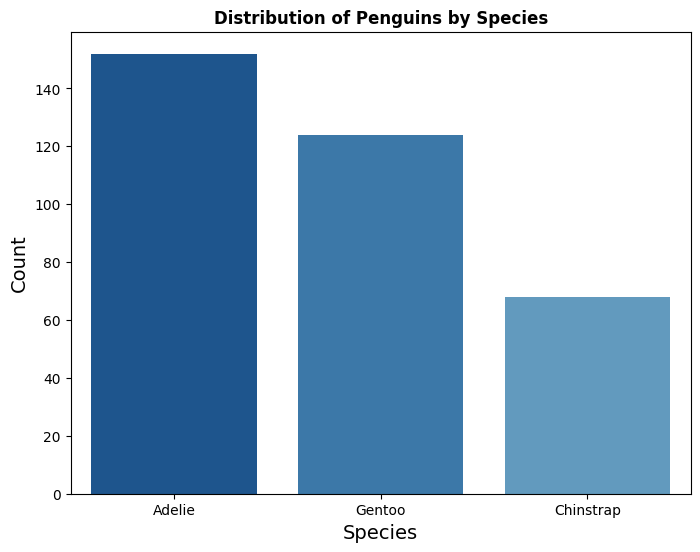

In [12]:

pl.figure(figsize=(8, 6))
sns.set_palette('Blues_r')

sns.barplot(x=df['species'].value_counts().index, y=df['species'].value_counts())
pl.title("Distribution of Penguins by Species", fontweight='bold')
pl.xticks()
pl.xlabel("Species", fontsize=14)
pl.ylabel("Count", fontsize=14)

pl.show()


### **Bivariate Analysis**

In [13]:
sns.set()

In [14]:
def box(x_column, y_column, hue_column, data):
    sns.boxplot(y=y_column, x=x_column, hue=hue_column, data=data)

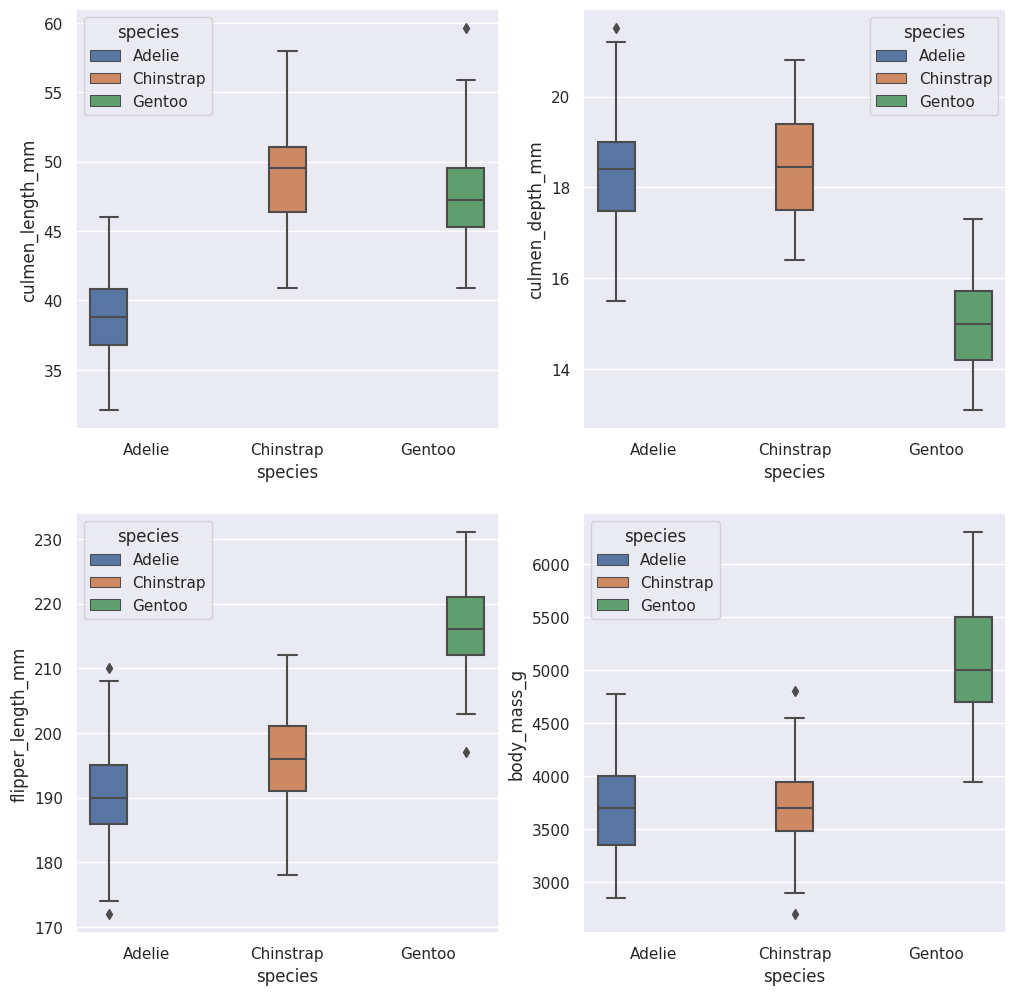

In [15]:

plots = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

pl.figure(figsize=(12, 12))
i = 0

for feature in plots:
    pl.subplot(2, 2, i + 1)
    box('species', feature, 'species',df)
    i += 1

pl.show()


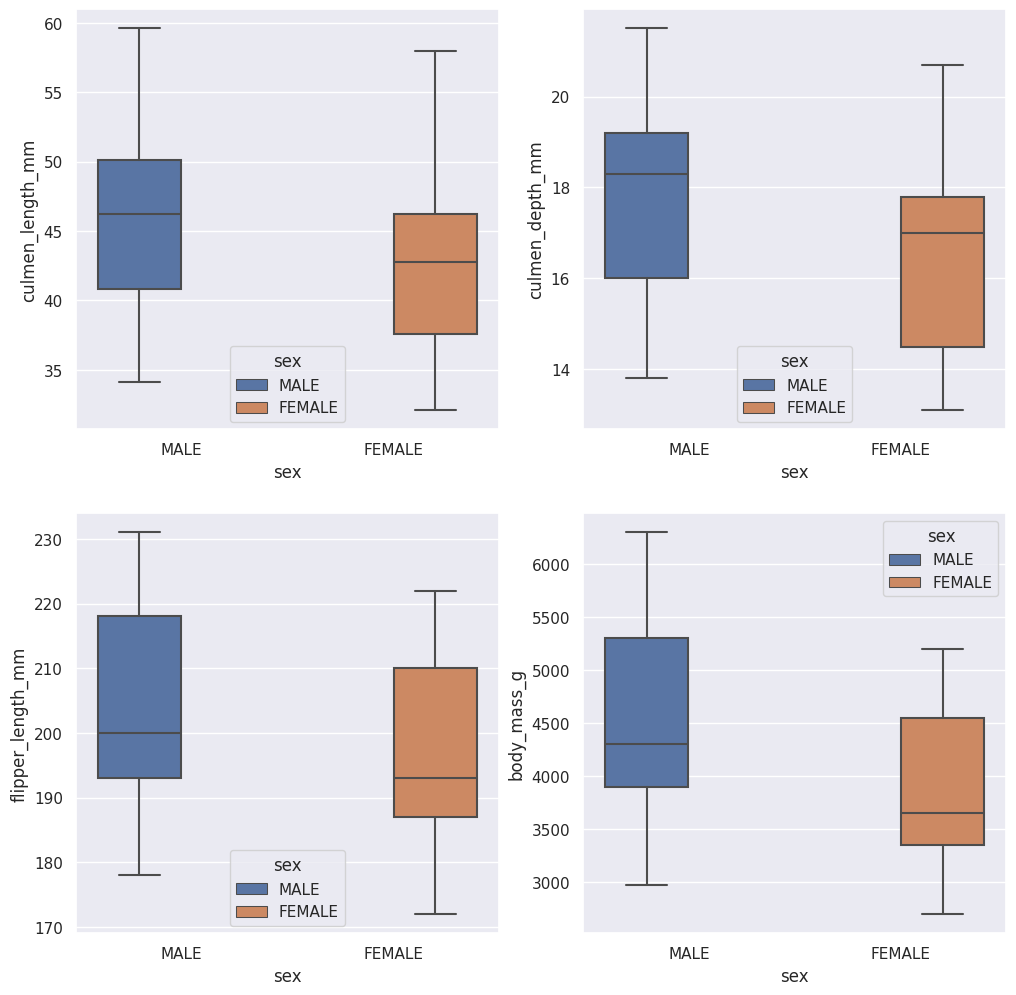

In [16]:

plots = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

pl.figure(figsize=(12, 12))
i = 0

for feature in plots:
    pl.subplot(2, 2, i + 1)
    box('sex', feature, 'sex',df)
    i += 1

pl.show()


### **Multivariate Analysis**

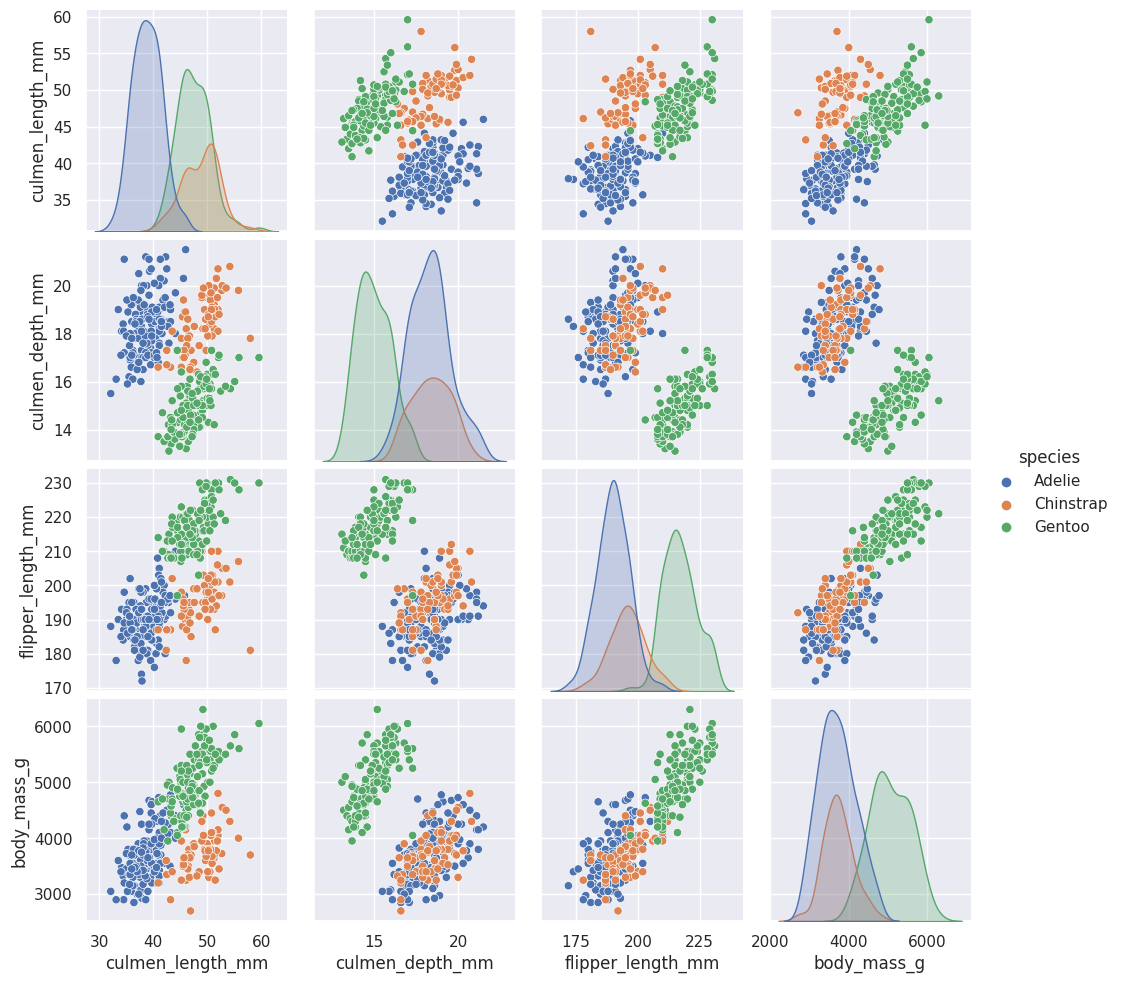

In [17]:
sns.pairplot(df, hue = 'species')
pl.show()

### **Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.sex = le.fit_transform(df.sex)
df.species = le.fit_transform(df.species)

**Encoding Information**:

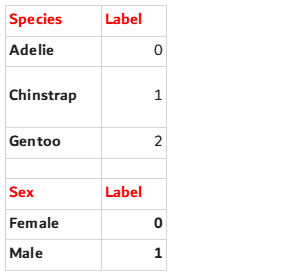

In [19]:
df = pd.get_dummies(df, columns= ['island'])
df.head(3)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,1,0,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,0,1
2,0,40.3,18.0,195.0,3250.0,0,0,0,1


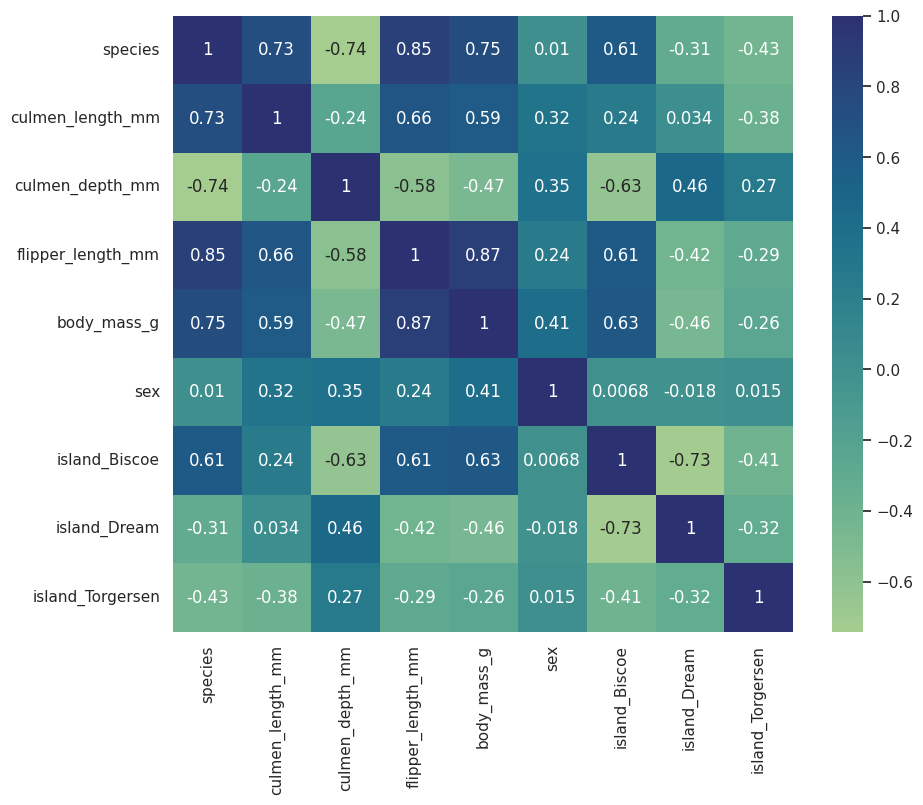

In [20]:
pl.figure(figsize=(10, 8))
sns.heatmap(df.corr() , annot = True, cmap = 'crest')
pl.show()

In [21]:
df.corr().species.sort_values(ascending = False )

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
island_Biscoe        0.610710
sex                  0.010240
island_Dream        -0.311589
island_Torgersen    -0.434574
culmen_depth_mm     -0.741282
Name: species, dtype: float64

### **Splitting the data into dependent and independent variables**

In [22]:
Y = df['species']
X = df.drop(columns = ['species'], axis = 1 )

### **Scaling the data**

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### **Splitting the data into training and testing dataset**

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 100)

In [26]:
X_train.head(3)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
331,0.643636,0.333333,0.966102,0.902778,1.0,1.0,0.0,0.0
296,0.560000,0.130952,0.627119,0.527778,0.0,1.0,0.0,0.0
23,0.221818,0.595238,0.220339,0.347222,1.0,1.0,0.0,0.0


In [27]:
X_train.shape

(275, 8)

In [28]:
X_test.shape

(69, 8)